목표가 설정
아래 공식을 사용하여 목표가(Target)를 계산합니다.
목표가 = 당일 시가 + (전일 변동폭 * K)
변동폭 = 전일 고가 - 전일 저가

In [288]:
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [289]:
kodexInverseX2 = stock.get_market_ohlcv_by_date("20000101", "20250101", "500072")
kodex150X2 = stock.get_market_ohlcv_by_date("20000101", "20250101", "233740")
# kodex150X2 233740


In [290]:
# kodexInverseX2

In [291]:
# 변동폭 만들기

kodex150X2['변동폭'] = kodex150X2['고가'] - kodex150X2['저가']
kodexInverseX2['변동폭'] = kodexInverseX2['고가'] - kodexInverseX2['저가']
# kodex150X2.columns

In [292]:
# 전일 변동폭 만들기

kodex150X2['전일 변동폭'] = kodex150X2['변동폭'].shift(periods=1)
kodexInverseX2['전일 변동폭'] = kodexInverseX2['변동폭'].shift(periods=1)
# kodexInverseX2[['전일 변동폭']]

In [293]:
kodex150X2['목표가'] = kodex150X2['시가'] + (kodex150X2['전일 변동폭'] * 0.2)
# kodex150X2.head(10)
kodexInverseX2['목표가'] = kodexInverseX2['시가'] + (kodexInverseX2['전일 변동폭'] * 0.2)
# kodexInverseX2.head(10)


In [294]:
kodex150X2['종가'] / kodex150X2['목표가']
kodexInverseX2['종가'] / kodexInverseX2['목표가']

날짜
2022-10-17         NaN
2022-10-18    0.982342
2022-10-19    1.014595
2022-10-20    1.021479
2022-10-21    0.986485
                ...   
2024-12-20    1.038258
2024-12-23    0.983436
2024-12-24    0.991477
2024-12-26    1.023825
2024-12-27    1.013842
Length: 542, dtype: float64

In [295]:
kodex150X2Conditions = kodex150X2['고가'] >= kodex150X2['목표가'] # 매도 조건
kodex150X2['수익률'] = np.where(kodex150X2Conditions, kodex150X2['종가'] / kodex150X2['목표가'] , 1)
kodex150X2['누적수익률'] = kodex150X2['수익률'].cumprod()

# KodexInverseX2
kodexInverseX2Conditions = kodexInverseX2['고가'] >= kodexInverseX2['목표가'] # 매도 조건
kodexInverseX2['수익률'] = np.where(kodexInverseX2Conditions, kodexInverseX2['종가'] / kodexInverseX2['목표가'] , 1)
kodexInverseX2['누적수익률'] = kodexInverseX2['수익률'].cumprod()

# kodexInverseX2['누적수익률'].plot(figsize=(10,5))



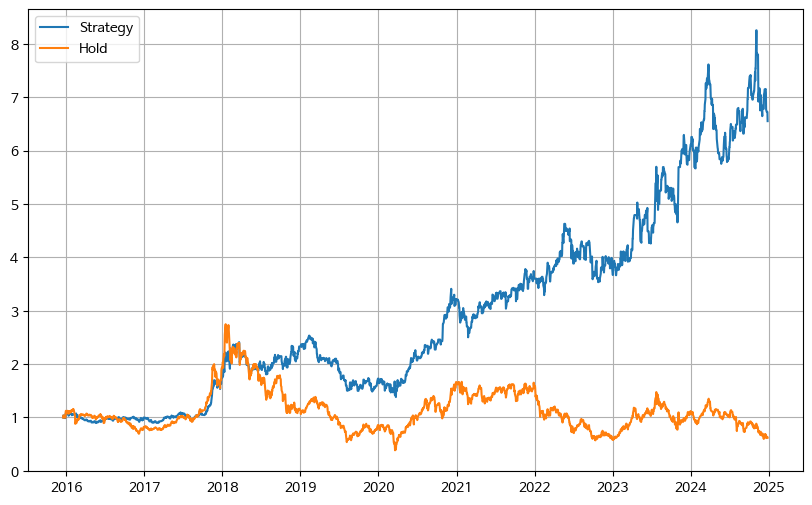

In [296]:
delta_days = kodex150X2.index[-1] - kodex150X2.index[0]
delta_days.days
year = delta_days.days / 365

cagr = (kodex150X2['누적수익률'].iloc[-1] ** (1 / year)) - 1
cagr*100


plt.figure(figsize=(10, 6))

# 변동성 돌파 전략
plt.plot(kodex150X2['누적수익률'], label='Strategy')

# 단순 보유
plt.plot(kodex150X2['종가'] / kodex150X2['종가'].iloc[0], label='Hold')


plt.grid()
plt.legend()
plt.show()

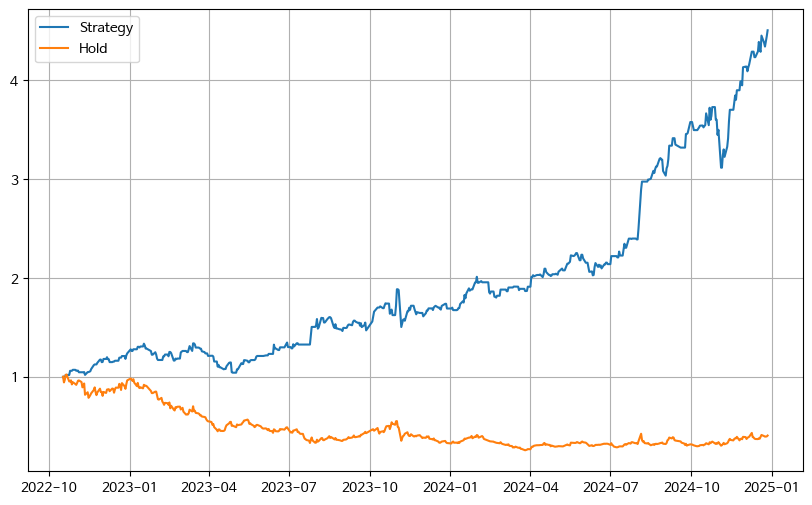

In [297]:
delta_days = kodexInverseX2.index[-1] - kodexInverseX2.index[0]
delta_days.days
year = delta_days.days / 365

cagr = (kodexInverseX2['누적수익률'].iloc[-1] ** (1 / year)) - 1
cagr*100

plt.figure(figsize=(10, 6))

# 변동성 돌파 전략
plt.plot(kodexInverseX2['누적수익률'], label='Strategy')

# 단순 보유
plt.plot(kodexInverseX2['종가'] / kodexInverseX2['종가'].iloc[0], label='Hold')


plt.grid()
plt.legend()
plt.show()

In [298]:
# 0.7 150x2 20
# 0.7 inversex2 6


# 0.5 150x2 28
# 0.5 inversex2 12


# 0.3 150x2 33
# 0.3 inversex2 13

# 결론 0.3 하자~